<a href="https://colab.research.google.com/github/Ritika3013/HeartDiseasePrediction/blob/main/HeartDiseasesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction using Machine Learning Algorithms**

***Importing libraries ***

*   Numpy (Data Analysis)
*   Pandas
*   Matplotlib , Seaborn(Data Visualization)
*   Sklitlearn (Machin learning Algorithm)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving heart.csv to heart.csv


In [8]:
import io
data = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.shape

(303, 14)

In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB



*   Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking .
*   Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes.

*  Other factors include stress, alcohol and poor diet/nutrition








In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 *So, we have no missing values*

In [13]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


*This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.*

# **Exploratory Data Analysis (EDA)**

Basic EDA of data is to be done before preparing the model to find all possible corelations and dependency factor.

In [14]:
y = data["target"]

1    165
0    138
Name: target, dtype: int64


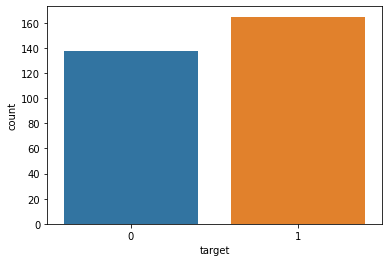

In [15]:
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

In [17]:
data["sex"].unique()

array([1, 0])

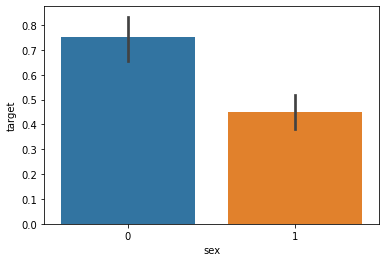

In [18]:
sns.barplot(data["sex"],data["target"])

*Here 0 is female and 1 is male patients*

In [19]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [20]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [21]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [22]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)

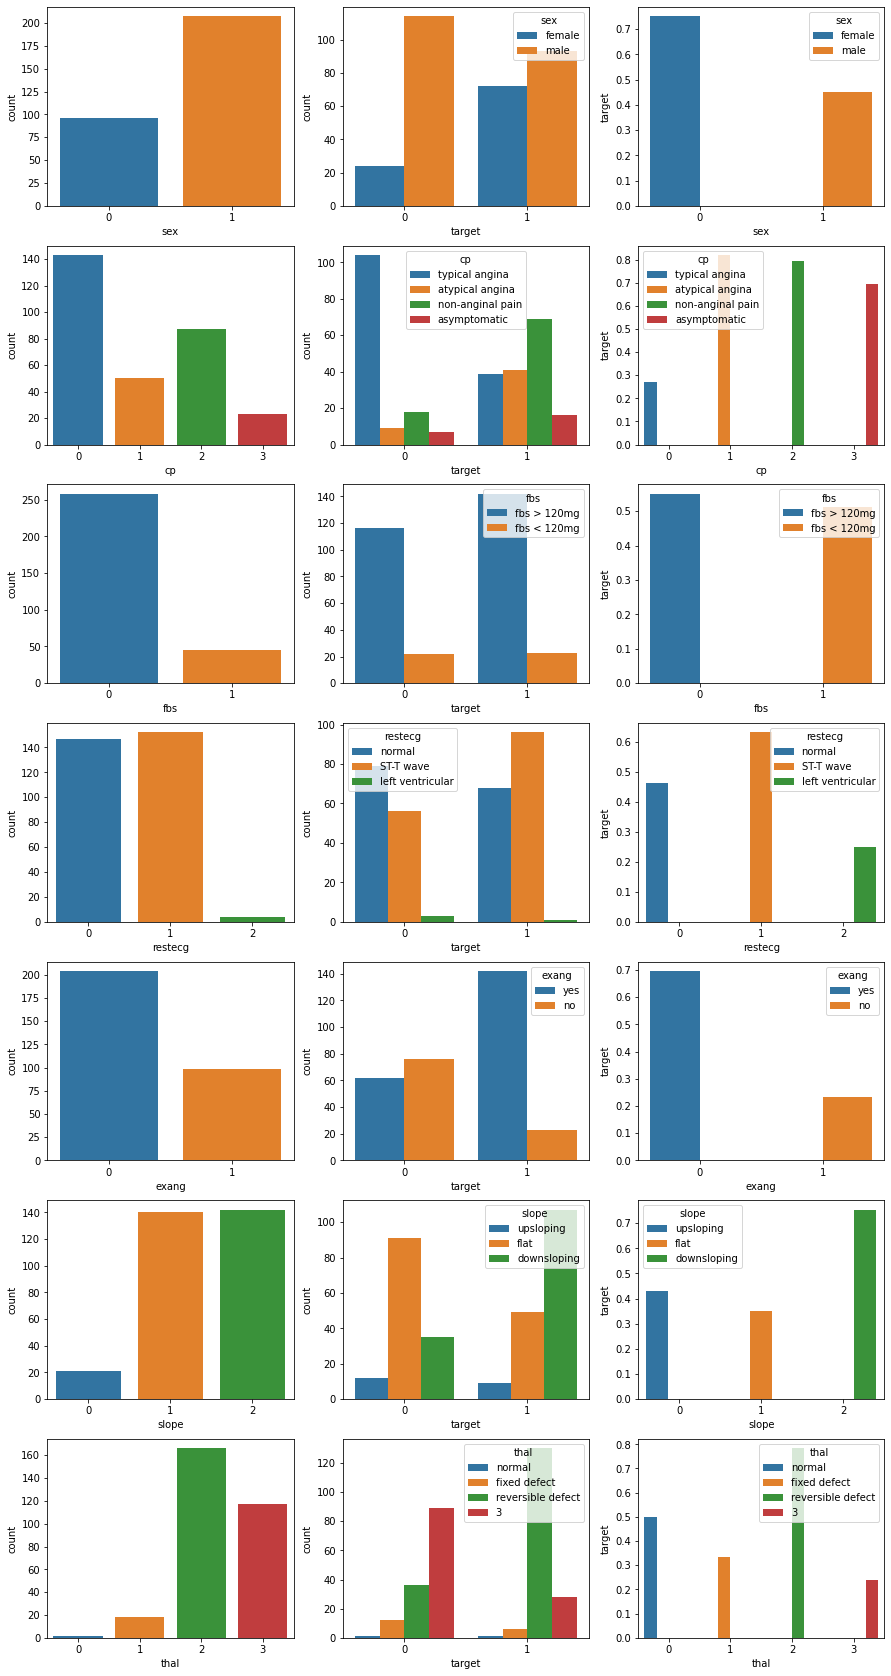

In [23]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

*Heart Disease Frequency for ages*

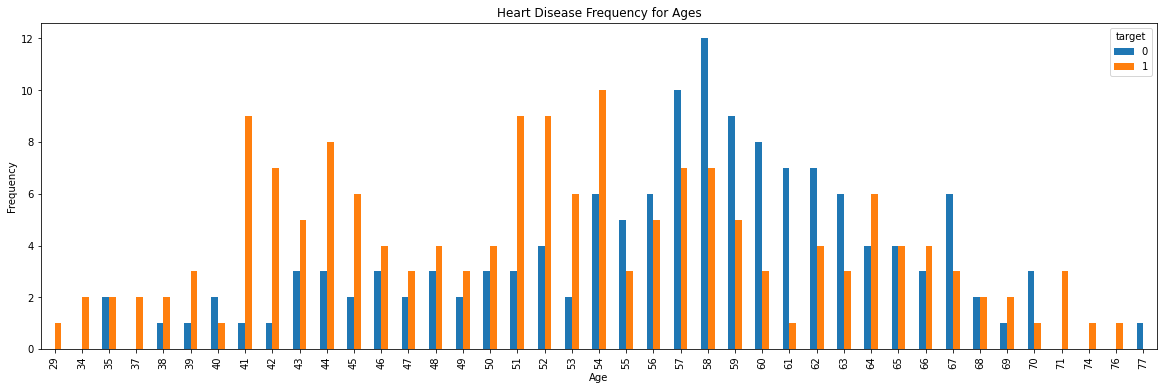

In [28]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


**> Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)**







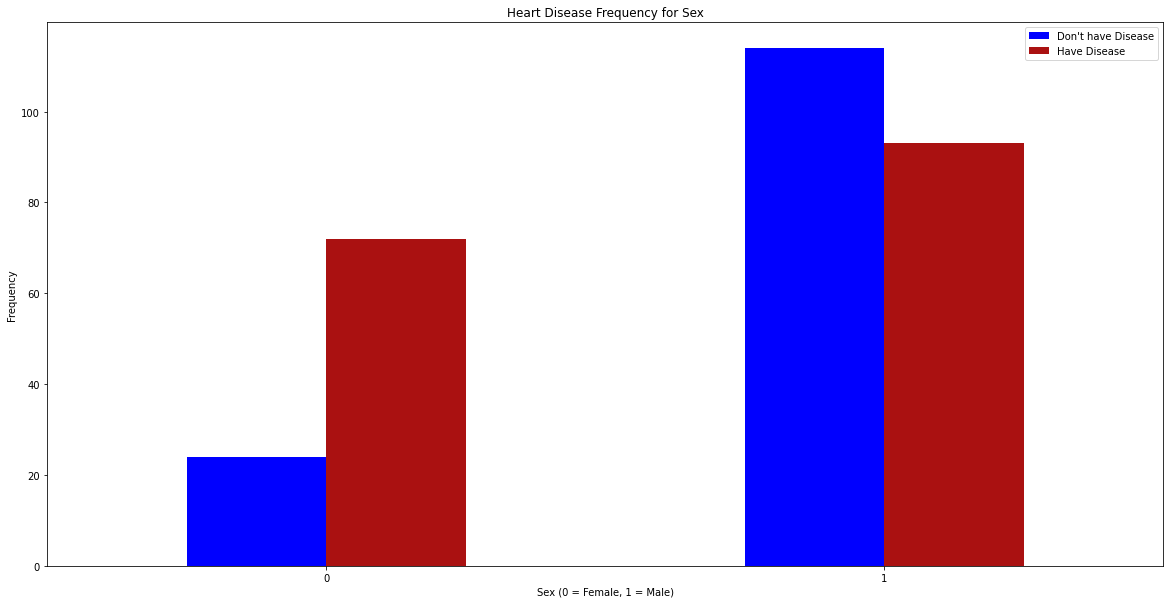

In [29]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

**Heart disease according to Fasting Blood sugar**

In [31]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [32]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


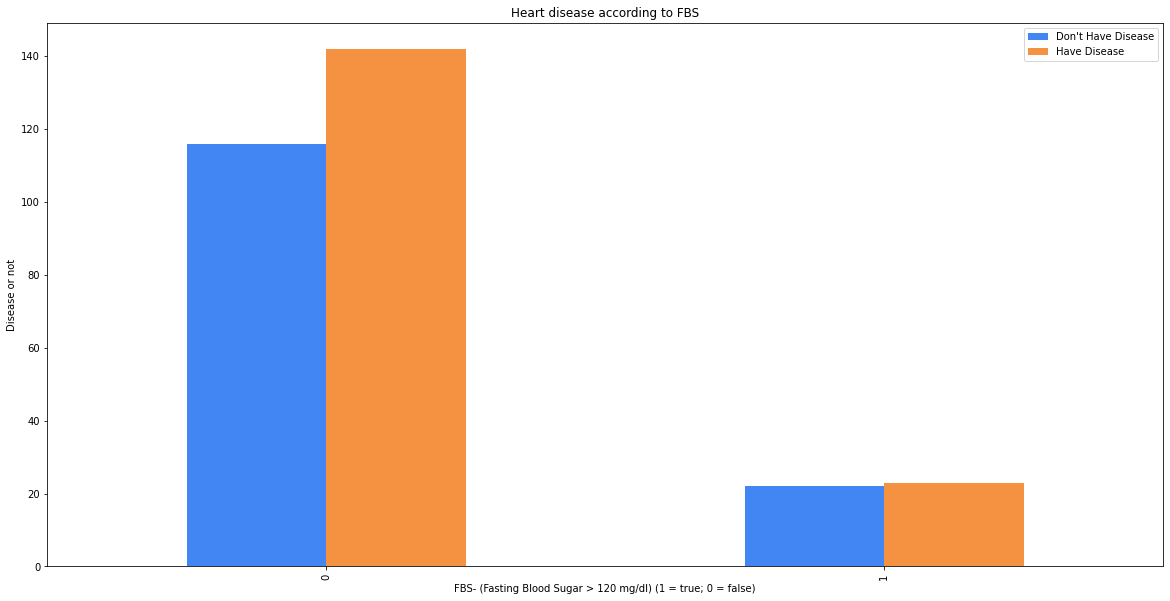

In [33]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()


**Analysing the chest pain (4 types of chest pain)**

1.   **typical angina**
2.   **atypical angina**
3.   **non-anginal pain**
4.   **asymptomatic** 


In [34]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0])

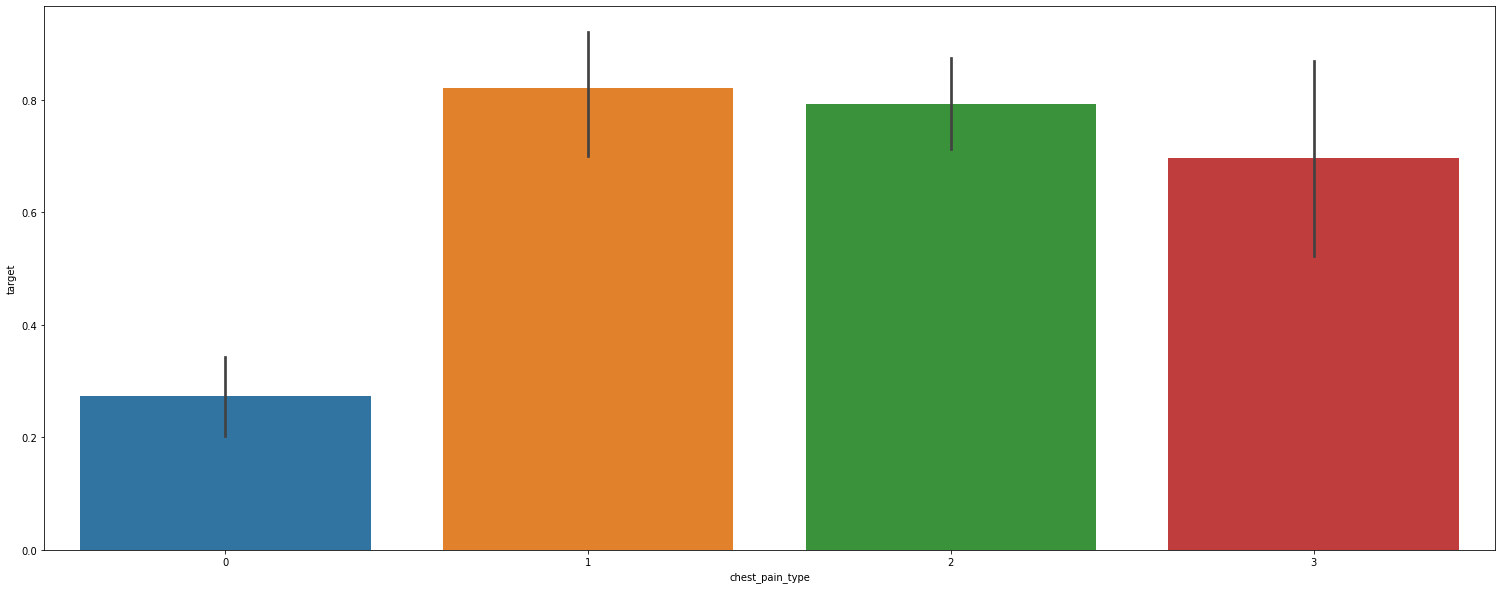

In [35]:
plt.figure(figsize=(26, 10))
sns.barplot(data["chest_pain_type"],y)

**Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)**

In [36]:
data["rest_ecg"].unique()

array([0, 1, 2])

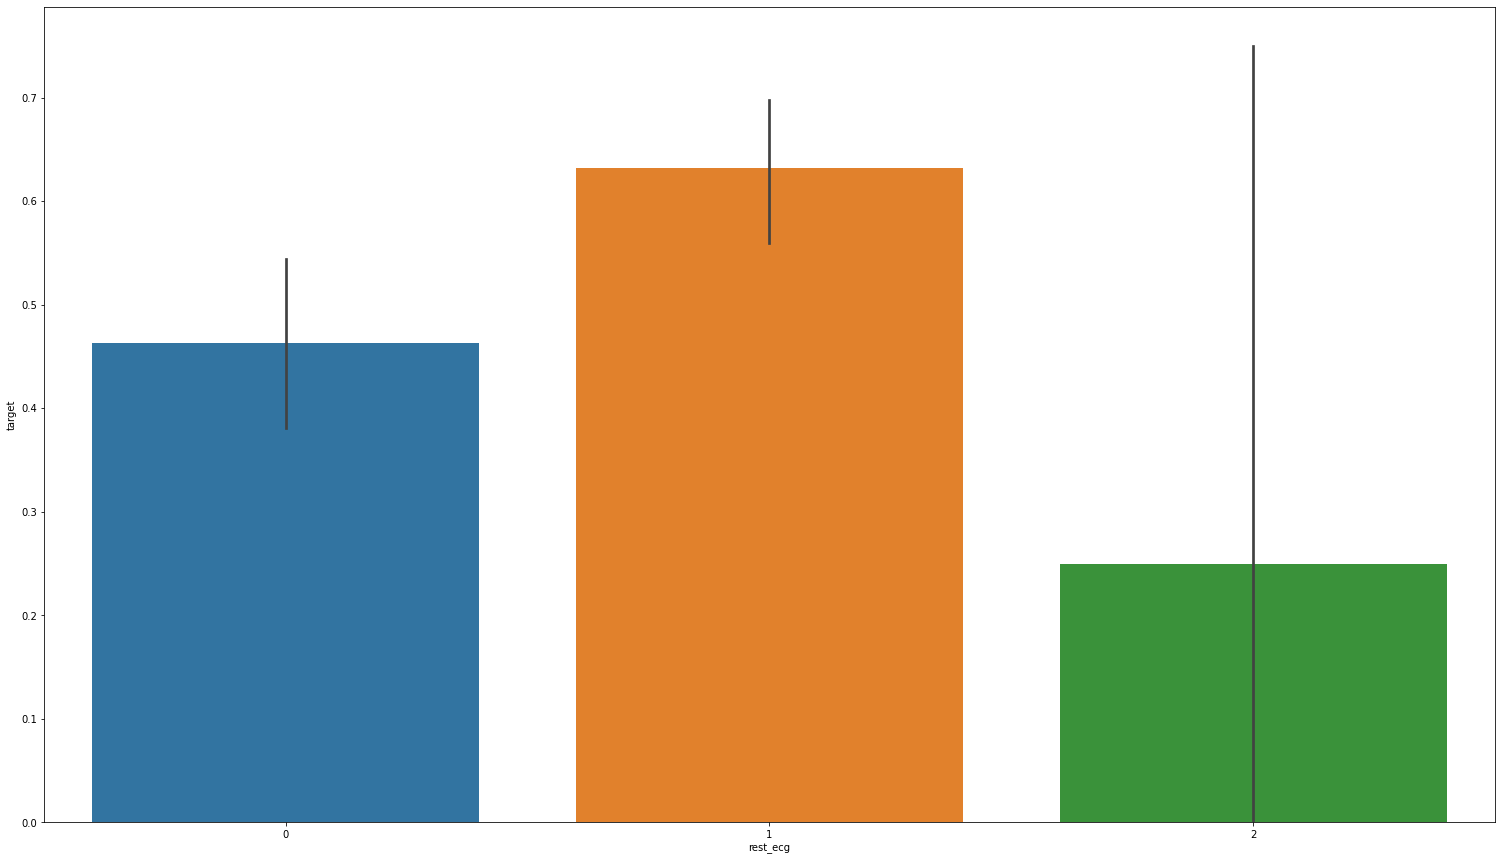

In [37]:
plt.figure(figsize=(26, 15))
sns.barplot(data["rest_ecg"],y)

**people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'**

**Analysing Exercise induced angina (1 = yes; 0 = no)**

In [38]:
data["exercise_induced_angina"].unique()

array([0, 1])

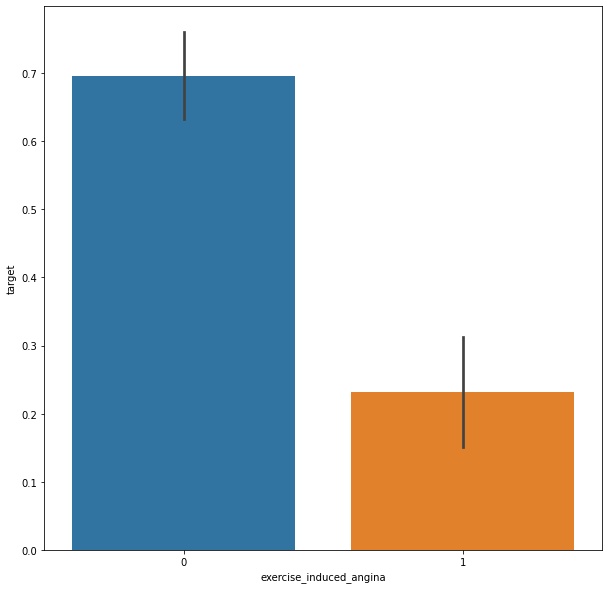

In [39]:
plt.figure(figsize=(10, 10))
sns.barplot(data["exercise_induced_angina"],y)

*People with exercise_induced_angina=1 are much less likely to have heart problems*

**Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)**

In [40]:
data["thalassemia"].unique()

array([1, 2, 3, 0])

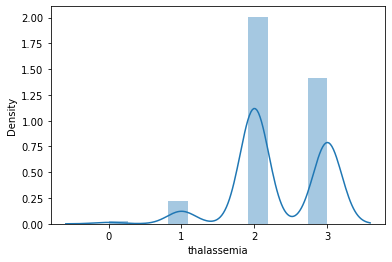

In [41]:
sns.distplot(data["thalassemia"])

*comparing with target*

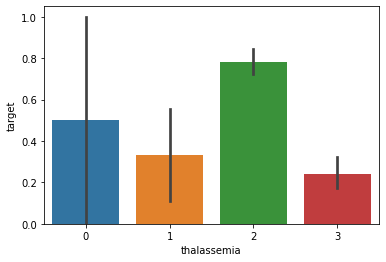

In [42]:
sns.barplot(data["thalassemia"],y)

**Correlation plot**
Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [43]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

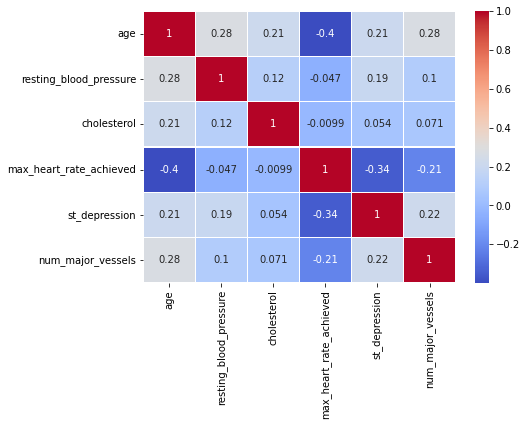

In [44]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

# Splitting the dataset to Train and Test

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [47]:
X_train.shape

(242, 13)

In [48]:
X_test.shape

(61, 13)

# Modelling and predicting with Machine Learning

The main goal of the entire project is to predict heart disease occurrence with the highest accuracy. In order to achieve this, we will test several classification algorithms. This section includes all results obtained from the study and introduces the best performer according to accuracy metric.

The reason for displaying accuracy on both, train and test sets, is to allow us to evaluate whether the model overfits or underfits the data (so-called bias/variance tradeoff).

**Logistic regression**

In [54]:
from sklearn.metrics import accuracy_score


In [51]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    """
    Fit the chosen model and print out the score.
    
    """
    
    # instantiate model
    model = classifier(**kwargs)
    
    # train model
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [55]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [56]:
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 84.71%
Test accuracy: 85.25%


**Confusion Matrix**
Confusion matric simply tells how mnay predicted categories are correctly predicted and how many not coreectly predicted !

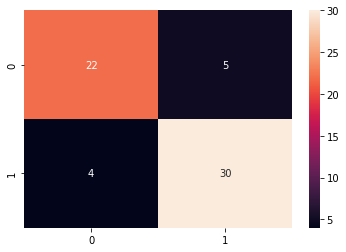

In [57]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(matrix,annot = True, fmt = "d")

**Precision Score**

quantifies the number of positive class predictions that actually belong to the positive class.

In [58]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_lr)
print("Precision: ",precision)

Precision:  0.8571428571428571


**Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [60]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


**Confusion matrix of Random Forest**

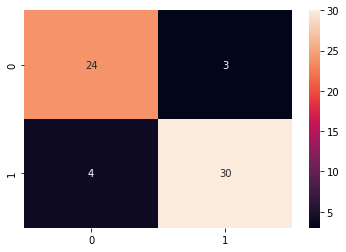

In [62]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_rf)
sns.heatmap(matrix,annot = True, fmt = "d")

**Precision score**

In [63]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_rf)
print("Precision: ",precision)

Precision:  0.9090909090909091


**KNN(K Nearest Neighbors)**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [65]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [66]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


**Confusion matrix for KNN**

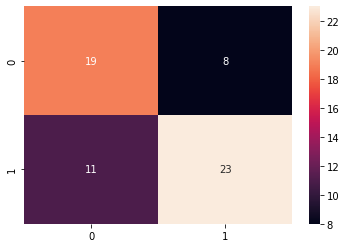

In [67]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_knn)
sns.heatmap(matrix,annot = True, fmt = "d")

**Precision score**

In [68]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_knn)
print("Precision: ",precision)

Precision:  0.7419354838709677


**Naive Bayes**

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [70]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


**Confusion matrix of Naive Bayes**

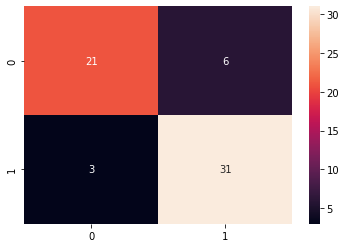

In [71]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_nb)
sns.heatmap(matrix,annot = True, fmt = "d")

In [72]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_nb)
print("Precision: ",precision)

Precision:  0.8378378378378378


**Decision Tree**

In [73]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [74]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [75]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


**Confusion Matrix **

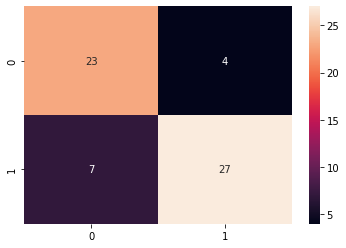

In [76]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, y_pred_dt)
sns.heatmap(matrix,annot = True, fmt = "d")

In [77]:
from sklearn.metrics import precision_score
precision = precision_score(Y_test, y_pred_dt)
print("Precision: ",precision)

Precision:  0.8709677419354839


# FINAL SCORE

In [78]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
        GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    accuracy.append(score)

In [79]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,0.688525
Decision Trees,0.819672
Logistic Regression,0.852459
Naive Bayes,0.852459
Random Forests,0.885246


**So Random Forest algorithm is the best here and Naive Bayes is the 2nd Best
And here KNN is the worst algorithm**